<a href="https://colab.research.google.com/github/Sino-taku/PyTorch_Reference-/blob/main/FFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#FFT（高速フーリエ展開）について


今回はフーリエ変換を使用し周期２と６を足したグラフの周期が正確に出るのか確認していく。

通常周期を確認すると後半に複素共役に関係して鏡像が出ますが無視してください、今回は出力を半分にする処理をしています。

F = np.fft.fft(f)のあとの処理は元の振幅にそろえるためにピーク強度の値をデータ数で割ります。ただし、対となる鏡像の値も足しわせる必要があるのでデータ数で割ったあと2倍。（データ数の半分で割っても同じ）

＊周期はデータ数の半分しか確認できないことに注意しましょう（サンプリング定理）
＊フーリエ展開のデータの個数は２のｎ乗

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import signal

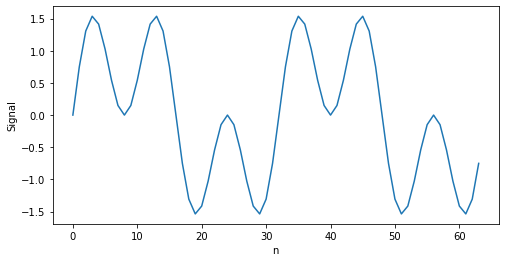

In [ ]:

N = 64 # データ数
n = np.arange(N)
f1 = 2 # 周期
f2 = 6 
f = np.sin(f1 * 2 * np.pi * (n/N)) + np.sin(f2 * 2 * np.pi * (n/N)) 

# グラフ表示
plt.figure(figsize=(8, 4))
plt.xlabel('n')
plt.ylabel('Signal')
plt.plot(f)

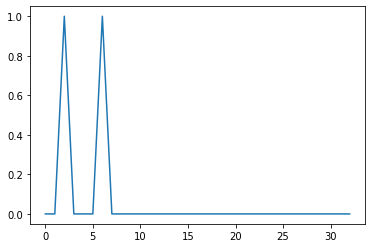

In [ ]:
# 高速フーリエ変換(FFT)
F = np.fft.fft(f)
# FFT結果（複素数）を絶対値に変換
F_abs = np.abs(F)
# 振幅を元に信号に揃える
F_abs_amp = F_abs / N * 2 # 交流成分はデータ数で割って2倍する
F_abs_amp[0] = F_abs_amp[0] / 2 # 直流成分（今回は扱わないけど）は2倍不要

# グラフ表示（データ数の半分の周期を表示）
plt.plot(F_abs_amp[:int(N/2)+1])

#信号を時間軸と周波数軸でグラフに表現

前回は説明のため時間（X）軸を意識していなかったけど今回はそこまで意識します。

今回の定義

データ数を128個（2の6乗）、サンプリング周期は0.01秒（10ms）、データ全体の時間は1.28秒（0.01×128）、周波数は10Hz（波数が1秒間に10個)、振幅は１

グラフで使う時間軸はNumpyのarrange(開始,終了,間隔)で作成。

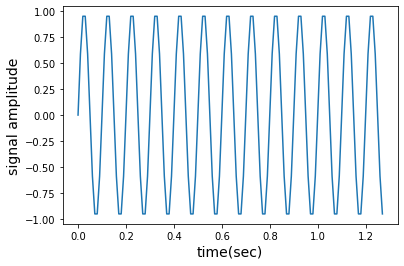

In [ ]:
N = 128 # サンプル数
dt = 0.01 # サンプリング周期(sec):100ms =>サンプリング周波数100Hz
freq = 10 # 周波数(10Hz) =>正弦波の周期0.1sec
amp = 1 # 振幅
t = np.arange(0, N*dt, dt) # 時間軸
f = amp * np.sin(2*np.pi*freq*t) # 信号（周波数10、振幅1の正弦波）
# グラフ表示
plt.xlabel('time(sec)', fontsize=14)
plt.ylabel('signal amplitude', fontsize=14)
plt.plot(t, f)

FFTする際にｘ軸を時間から周波数に直す必要がある、周波数（Hz）の取る範囲は、1/サンプリング周期（秒）で求める、この場合は1/0.01だから100Hzまで。

つまり解析できる周波数はサンプリング周波数に依存する。



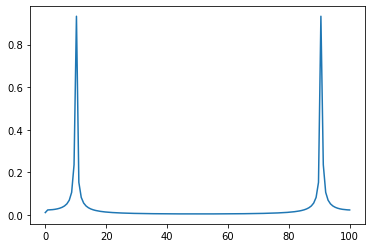

In [ ]:
F = np.fft.fft(f) # 高速フーリエ変換(FFT)
# FFTの複素数結果を絶対に変換
F_abs = np.abs(F)
# 振幅をもとの信号に揃える
F_abs_amp = F_abs / N * 2 # 交流成分はデータ数で割って2倍する
F_abs_amp[0] = F_abs_amp[0] / 2 # 直流成分（今回は扱わないけど）は2倍不要
# 周波数軸のデータ作成
fq = np.linspace(0, 1.0/dt, N) # 周波数軸　linspace(開始,終了,分割数)
plt.plot(fq, F_abs_amp)

#今回使用したデータをまとめました。

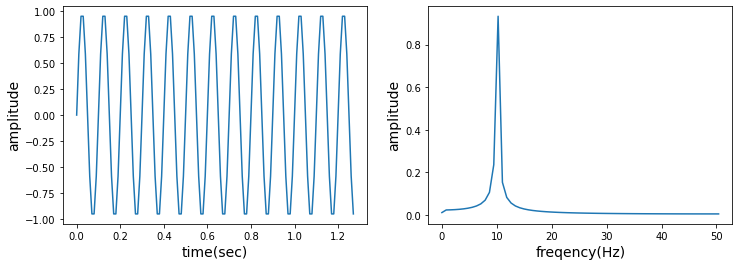

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 簡単な信号の作成
N = 128 # サンプル数
dt = 0.01 # サンプリング周期(sec):100ms =>サンプリング周波数100Hz
freq = 10 # 周波数(10Hz) =>正弦波の周期0.1sec
amp = 1 # 振幅
t = np.arange(0, N*dt, dt) # 時間軸
f = amp * np.sin(2*np.pi*freq*t) # 信号（周波数10、振幅1の正弦波）

# 高速フーリエ変換(FFT)
F = np.fft.fft(f) #

# FFTの複素数結果を絶対に変換
F_abs = np.abs(F)
# 振幅をもとの信号に揃える
F_abs_amp = F_abs / N * 2 # 交流成分はデータ数で割って2倍
F_abs_amp[0] = F_abs_amp[0] / 2 # 直流成分（今回は扱わないけど）は2倍不要

# 周波数軸のデータ作成
fq = np.linspace(0, 1.0/dt, N) # 周波数軸　linspace(開始,終了,分割数)

# グラフ表示
fig = plt.figure(figsize=(12, 4))
# 信号のグラフ（時間軸）
ax2 = fig.add_subplot(121)
plt.xlabel('time(sec)', fontsize=14)
plt.ylabel('amplitude', fontsize=14)
plt.plot(t, f)

# FFTのグラフ（周波数軸）
ax2 = fig.add_subplot(122)
plt.xlabel('freqency(Hz)', fontsize=14)
plt.ylabel('amplitude', fontsize=14)
plt.plot(fq[:int(N/2)+1], F_abs_amp[:int(N/2)+1]) # ナイキスト定数まで表示

#逆高速フーリエ変換（IFFT(inverse fast Fourier transform))

まずは簡単な合成グラフを作成して、FFTを行います。


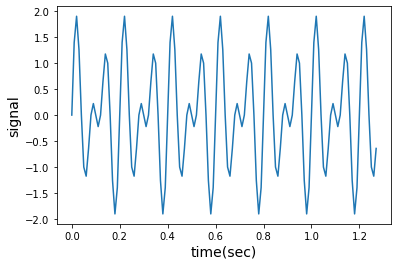

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 簡単な信号の作成
N = 128 # サンプル数
dt = 0.01 # サンプリング周期(sec):100ms =>サンプリング周波数100Hz
freq1 = 10 # 周波数(10Hz) =>正弦波の周期0.1sec
amp1 = 1 # 振幅
freq2 = 15 # 周波数(15Hz) =>正弦波の周期0.066...sec
amp2 = 1 # 振幅

t = np.arange(0, N*dt, dt) # 時間軸
f = amp1 * np.sin(2*np.pi*freq1*t) + amp2 * np.sin(2*np.pi*freq2*t) # 信号
# グラフ表示
plt.xlabel('time(sec)', fontsize=14)
plt.ylabel('signal', fontsize=14)
plt.plot(t, f)

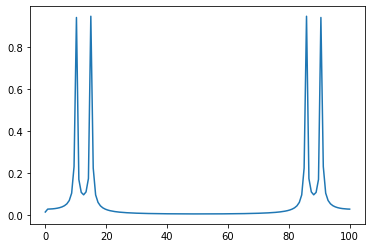

In [ ]:
# 高速フーリエ変換(FFT)
F = np.fft.fft(f)

# FFTの複素数結果を絶対に変換
F_abs = np.abs(F)
# 振幅をもとの信号に揃える
F_abs_amp = F_abs / N * 2 # 交流成分はデータ数で割って2倍
F_abs_amp[0] = F_abs_amp[0] / 2 # 直流成分（今回は扱わないけど）は2倍不要

# 周波数軸のデータ作成
fq = np.linspace(0, 1.0/dt, N) # 周波数軸　linspace(開始,終了,分割数)

# グラフ表示（FFT解析結果）
plt.plot(fq, F_abs_amp)

次にIFFTで元の信号に戻るのかやってみます

IFFTの結果は複素数なので、実数部の値だけ取り出す。複素数.realで取得

In [ ]:
F[:10] # FFTの結果を先頭10個だけ表示

array([1.74137876+0.j        , 1.75011493+0.06617893j,
       1.77689604+0.1359568j , 1.82354371+0.21346121j,
       1.89347771+0.30403524j, 1.99244927+0.41532429j,
       2.12999556+0.55924527j, 2.32243735+0.75596177j,
       2.59961839+1.04285493j, 3.02220287+1.49779194j])

In [ ]:
F_ifft = np.fft.ifft(F) # 逆フーリエ変換(IFFT)
F_ifft[:10] # IFFTで逆変換した結果を先頭10個だけ表示

array([ 4.51028104e-17+2.99239800e-17j,  1.39680225e+00+1.52655666e-16j,
        1.90211303e+00+1.38777878e-16j,  1.26007351e+00+2.08166817e-16j,
        1.88800800e-16+3.12146281e-17j, -1.00000000e+00-1.66533454e-16j,
       -1.17557050e+00+0.00000000e+00j, -6.42039522e-01+8.32667268e-17j,
       -1.12067886e-16-7.26575605e-17j,  2.21231742e-01+2.77555756e-16j])

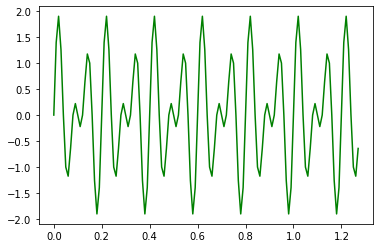

In [ ]:
#実数部のみ抽出

F_ifft_real = F_ifft.real # 実数部
F_ifft_real[:10]

#グラフ化
plt.plot(t, F_ifft_real, c="g") # IFFT（逆変換）

ぐらふを重ねて図示、結果まったく同じになることを確認

Text(0, 0.5, 'signal')

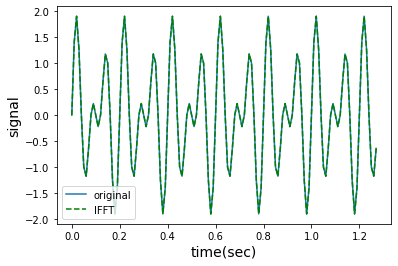

In [ ]:
plt.plot(t, f, label='original') # IFFT（逆変換）
plt.plot(t, F_ifft_real, c="g", linestyle='--', label='IFFT') # IFFT（逆変換）
plt.legend(loc='best')
plt.xlabel('time(sec)', fontsize=14)
plt.ylabel('signal', fontsize=14)

#FFTとIFFTを使って信号のノイズ成分を除去

まずはノイズを含んだデータを作成します。

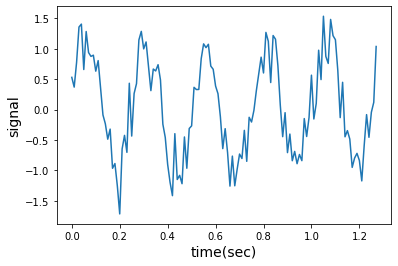

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(0) # 乱数seed固定

# 簡単な信号の作成(正弦波 + ノイズ)
N = 128 # サンプル数
dt = 0.01 # サンプリング周期(sec)
freq = 4 # 周波数(Hz)
amp = 1 # 振幅

t = np.arange(0, N*dt, dt) # 時間軸
f = amp * np.sin(2*np.pi*freq*t) + np.random.randn(N)*0.3 # 信号

# グラフ表示
plt.xlabel('time(sec)', fontsize=14)
plt.ylabel('signal', fontsize=14)
plt.plot(t, f)

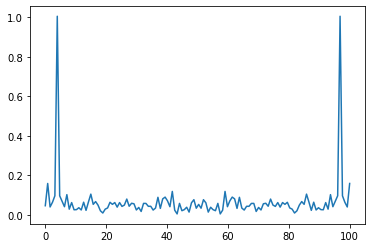

In [ ]:
# 高速フーリエ変換(FFT)
F = np.fft.fft(f)

# FFTの複素数結果を絶対値に変換
F_abs = np.abs(F)
# 振幅をもとの信号に揃える
F_abs_amp = F_abs / N * 2 # 交流成分はデータ数で割って2倍
F_abs_amp[0] = F_abs_amp[0] / 2 # 直流成分（今回は扱わないけど）は2倍不要

# 周波数軸のデータ作成
fq = np.linspace(0, 1.0/dt, N) # 周波数軸　linspace(開始,終了,分割数)

# グラフ表示（FFT解析結果）
plt.plot(fq, F_abs_amp)

#周波数でフィルタリング
今回は周波数10を超えるデータはノイズとみなして、フィルタリング処理でデータをゼロにする。フィルタリングに使う周波数をカットオフという。

データがNumPyなので配列の[]の中に条件を指定してその他を０にする。

＊まずはデータをコピーします。

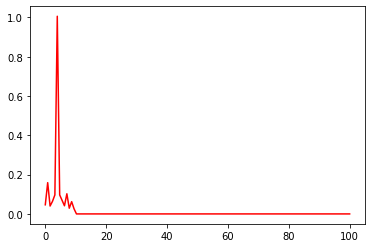

In [ ]:
F2 = np.copy(F) # FFT結果コピー
# 周波数でフィルタリング処理
fc = 10 # カットオフ（周波数）
F2[(fq > fc)] = 0 # カットオフを超える周波数のデータをゼロにする（ノイズ除去）
# フィルタリング処理したFFT結果の確認
# FFTの複素数結果を絶対値に変換
F2_abs = np.abs(F2)
# 振幅をもとの信号に揃える
F2_abs_amp = F2_abs / N * 2 # 交流成分はデータ数で割って2倍
F2_abs_amp[0] = F2_abs_amp[0] / 2 # 直流成分（今回は扱わないけど）は2倍不要

# グラフ表示（FFT解析結果）
plt.plot(fq, F2_abs_amp, c='r')

In [ ]:
# 周波数でフィルタリング（ノイズ除去）-> IFFT
F2_ifft = np.fft.ifft(F2) # IFFT

処理の際に鏡像を消してしまっているので結果から実数部の所得したデータは２倍にしておくこと

Text(0, 0.5, 'singnal')

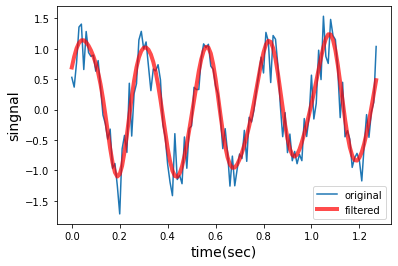

In [ ]:
F2_ifft_real = F2_ifft.real * 2 # 実数部の取得、振幅を元スケールに戻す

#比較しやすいように二つを重ねる
# グラフ表示：オリジナルとフィルタリング（ノイズ除去）
plt.plot(t, f, label='original')
plt.plot(t, F2_ifft_real, c="r", linewidth=4, alpha=0.7, label='filtered')
plt.legend(loc='best')
plt.xlabel('time(sec)', fontsize=14)
plt.ylabel('singnal', fontsize=14)


#振幅でフィルタリング

内容は上記とほぼ変わりません、実数地にするときに２倍にしないの以外

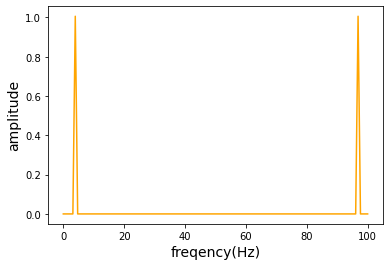

In [ ]:
F3 = np.copy(F) # FFT結果コピ
# 振幅強度でフィルタリング処理
F3 = np.copy(F) # FFT結果コピー
ac = 0.2 # 振幅強度の閾値
F3[(F_abs_amp < ac)] = 0 # 振幅が閾値未満はゼロにする（ノイズ除去)
# 振幅でフィルタリング処理した結果の確認
# FFTの複素数結果を絶対値に変換
F3_abs = np.abs(F3)
# 振幅をもとの信号に揃える
F3_abs_amp = F3_abs / N * 2 # 交流成分はデータ数で割って2倍
F3_abs_amp[0] = F3_abs_amp[0] / 2 # 直流成分（今回は扱わないけど）は2倍不要

# グラフ表示（FFT解析結果）
plt.xlabel('freqency(Hz)', fontsize=14)
plt.ylabel('amplitude', fontsize=14)
plt.plot(fq, F3_abs_amp, c='orange')

Text(0, 0.5, 'singnal')

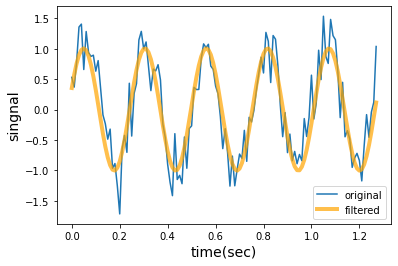

In [ ]:
# 振幅強度でフィルタリング（ノイズ除去）-> IFFT
F3_ifft = np.fft.ifft(F3) # IFFT
F3_ifft_real = F3_ifft.real # 実数部の取得
# グラフ（オリジナルとフィルタリングを比較）
plt.plot(t, f, label='original')
plt.plot(t, F3_ifft_real, c="orange", linewidth=4, alpha=0.7, label='filtered')
plt.legend(loc='best')
plt.xlabel('time(sec)', fontsize=14)
plt.ylabel('singnal', fontsize=14)

#まとめ

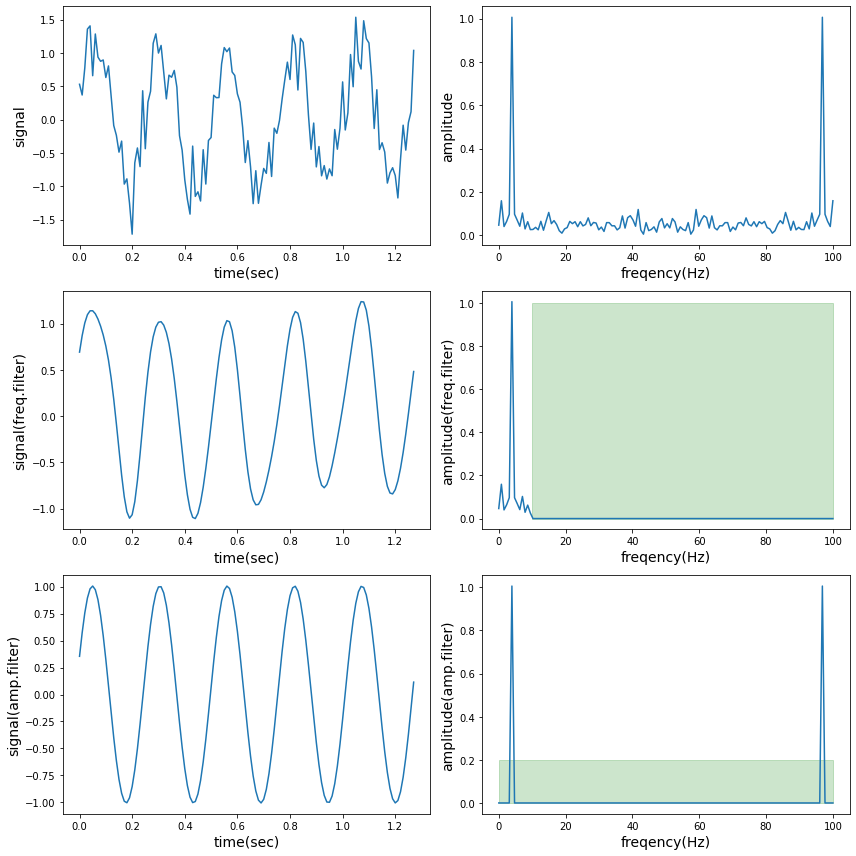

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(0) # 乱数seed固定

# 簡単な信号の作成(正弦波 + ノイズ)
N = 128 # サンプル数
dt = 0.01 # サンプリング周期(sec)
freq = 4 # 周波数(Hz)
amp = 1 # 振幅

t = np.arange(0, N*dt, dt) # 時間軸
f = amp * np.sin(2*np.pi*freq*t) + np.random.randn(N)*0.3 # 信号

# 高速フーリエ変換(FFT)
F = np.fft.fft(f)
F_abs = np.abs(F) # 複素数を絶対値に変換
F_abs_amp = F_abs / N * 2 # 振幅をもとの信号に揃える(交流成分2倍)
F_abs_amp[0] = F_abs_amp[0] / 2 # 振幅をもとの信号に揃える(直流成分非2倍)

# 周波数軸のデータ作成
fq = np.linspace(0, 1.0/dt, N) # 周波数軸　linspace(開始,終了,分割数)

# フィルタリング①（周波数でカット）＊＊＊＊＊＊
F2 = np.copy(F) # FFT結果コピー
fc = 10 # カットオフ（周波数）
F2[(fq > fc)] = 0 # カットオフを超える周波数のデータをゼロにする（ノイズ除去）
F2_abs = np.abs(F2) # FFTの複素数結果を絶対値に変換
F2_abs_amp = F2_abs / N * 2 # 振幅をもとの信号に揃える(交流成分2倍)
F2_abs_amp[0] = F2_abs_amp[0] / 2 # 振幅をもとの信号に揃える(直流成分非2倍)
F2_ifft = np.fft.ifft(F2) # IFFT
F2_ifft_real = F2_ifft.real * 2 # 実数部の取得、振幅を元スケールに戻す

# フィルタリング②（振幅強度でカット）＊＊＊＊＊＊
F3 = np.copy(F) # FFT結果コピー
ac = 0.2 # 振幅強度の閾値
F3[(F_abs_amp < ac)] = 0 # 振幅が閾値未満はゼロにする（ノイズ除去）
F3_abs = np.abs(F3)# 複素数を絶対値に変換
F3_abs_amp = F3_abs / N * 2 # 交流成分はデータ数で割って2倍
F3_abs_amp[0] = F3_abs_amp[0] / 2 # 直流成分（今回は扱わないけど）は2倍不要
F3_ifft = np.fft.ifft(F3) # IFFT
F3_ifft_real = F3_ifft.real # 実数部の取得

# グラフ表示
fig = plt.figure(figsize=(12, 12))

# グラフ表示
# オリジナル信号
fig.add_subplot(321) 
plt.xlabel('time(sec)', fontsize=14)
plt.ylabel('signal', fontsize=14)
plt.plot(t, f)

# オリジナル信号 ->FFT
fig.add_subplot(322) 
plt.xlabel('freqency(Hz)', fontsize=14)
plt.ylabel('amplitude', fontsize=14)
plt.plot(fq, F_abs_amp)

# オリジナル信号 ->FFT ->周波数filter ->IFFT
fig.add_subplot(323) 
plt.xlabel('time(sec)', fontsize=14)
plt.ylabel('signal(freq.filter)', fontsize=14)
plt.plot(t, F2_ifft_real)

# オリジナル信号 ->FFT ->周波数filter
fig.add_subplot(324) 
plt.xlabel('freqency(Hz)', fontsize=14)
plt.ylabel('amplitude(freq.filter)', fontsize=14)
# plt.vlines(x=[10], ymin=0, ymax=1, colors='r', linestyles='dashed')
plt.fill_between([10 ,100], [0, 0], [1, 1], color='g', alpha=0.2)
plt.plot(fq, F2_abs_amp)

# オリジナル信号 ->FFT ->振幅強度filter ->IFFT
fig.add_subplot(325) 
plt.xlabel('time(sec)', fontsize=14)
plt.ylabel('signal(amp.filter)', fontsize=14)
plt.plot(t, F3_ifft_real)

# オリジナル信号 ->FFT ->振幅強度filter
fig.add_subplot(326) 
plt.xlabel('freqency(Hz)', fontsize=14)
plt.ylabel('amplitude(amp.filter)', fontsize=14)
# plt.hlines(y=[0.2], xmin=0, xmax=100, colors='r', linestyles='dashed')
plt.fill_between([0 ,100], [0, 0], [0.2, 0.2], color='g', alpha=0.2)
plt.plot(fq, F3_abs_amp)

plt.tight_layout()